## Assignment: A4

#### Student Name 1: Christine Kim

#### UT EID 1: cmk3677

#### Student Name 2: Enrique Rivera Jr

#### UT EID 2: er34663

#### Date Created: 2/8/25

#### Date Last Modified: 2/10/25


# question 1

Numerically integrate the three functions listed in the book over the interval [-1,2] using Simpson's technique. Then verify that your numerical integral is correct to 6 decimal places using the scipy.integrate.quad module. Provide a plot of the function along with its numerical first derivative.

    

/var/folders/3h/z6jrjg9x4bv5skxm_s0x2l600000gn/T/ipykernel_1810/3245221455.py:21: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  I1_simps = simps(f1(x), x)
/var/folders/3h/z6jrjg9x4bv5skxm_s0x2l600000gn/T/ipykernel_1810/3245221455.py:22: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  I2_simps = simps(f2(x), x)
/var/folders/3h/z6jrjg9x4bv5skxm_s0x2l600000gn/T/ipykernel_1810/3245221455.py:23: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  I3_simps = simps(f3(x), x)





Simpson's integration of f1: -3.172986, quad integration of f1: -3.172986
Simpson's integration of f2: 17.100000, quad integration of f2: 17.100000
Simpson's integration of f3: 1.115045, quad integration of f3: 1.115045


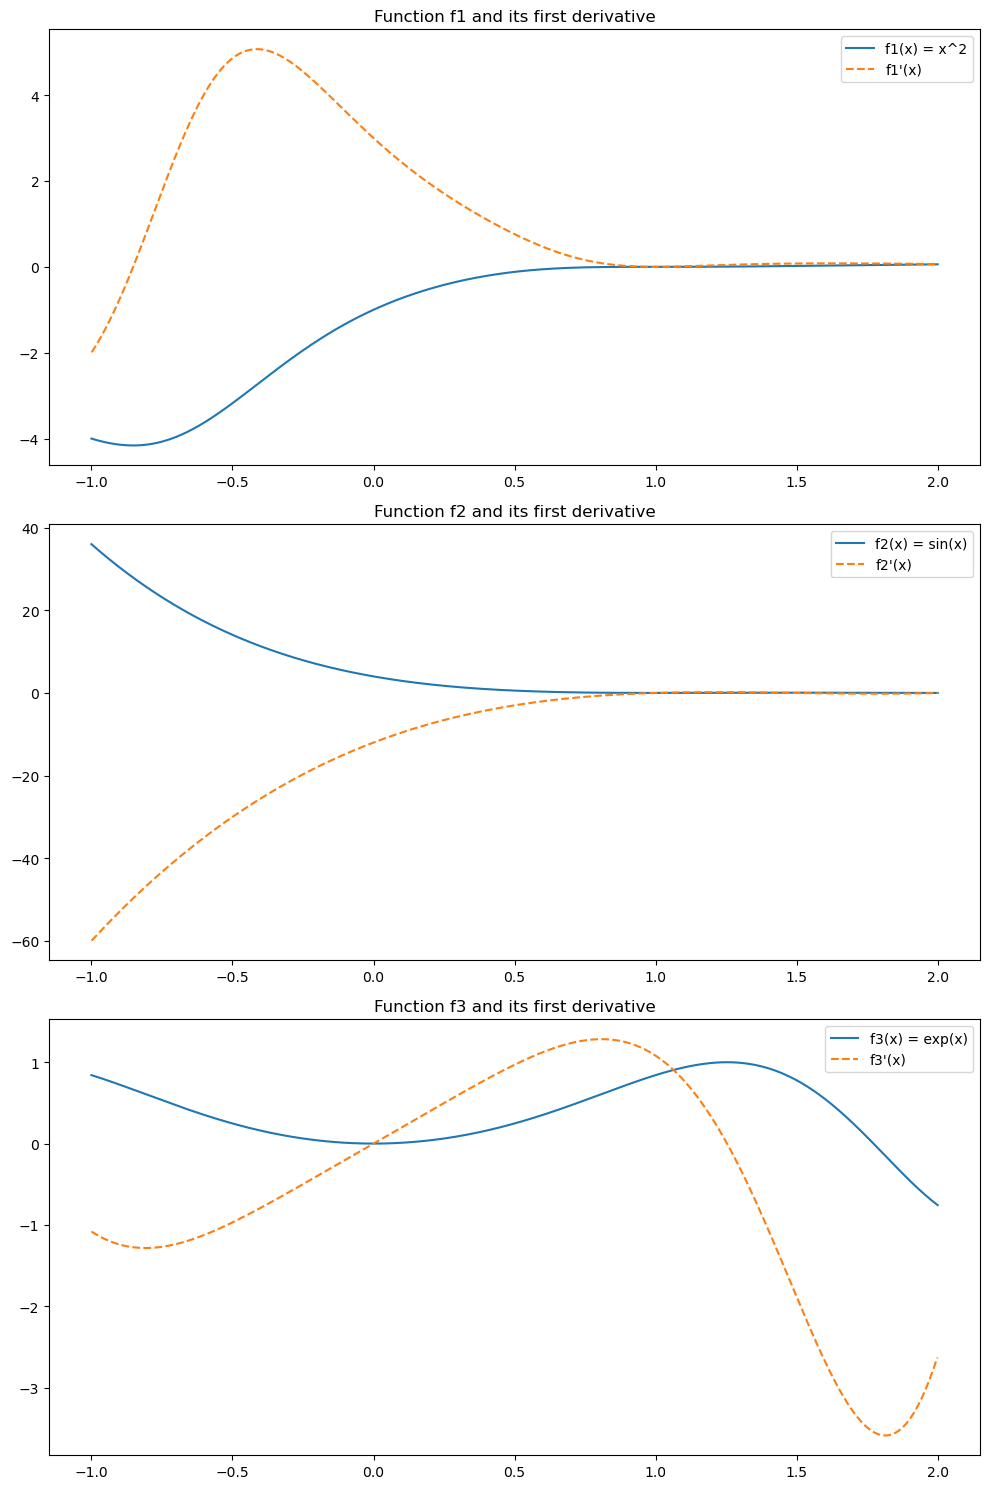

In [6]:
import numpy as np
from scipy.integrate import simps, quad

import matplotlib.pyplot as plt

# Define the functions
def f1(x):
    return (x-1)**3/(1+ x**4)

def f2(x):
    return ((x-1)**2) * ((x-2)**2)

def f3(x):
    return np.sin(x**2)

# Define the interval
a, b = -1, 2
x = np.linspace(a, b, 1000)

# Numerical integration using Simpson's technique
I1_simps = simps(f1(x), x)
I2_simps = simps(f2(x), x)
I3_simps = simps(f3(x), x)

# Verification using scipy.integrate.quad
I1_quad, _ = quad(f1, a, b)
I2_quad, _ = quad(f2, a, b)
I3_quad, _ = quad(f3, a, b)


# print white space to space decpraction
print("\n\n")
      
# Print the results
print(f"Simpson's integration of f1: {I1_simps:.6f}, quad integration of f1: {I1_quad:.6f}")
print(f"Simpson's integration of f2: {I2_simps:.6f}, quad integration of f2: {I2_quad:.6f}")
print(f"Simpson's integration of f3: {I3_simps:.6f}, quad integration of f3: {I3_quad:.6f}")

# Plot the functions and their numerical first derivatives
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Function 1
axs[0].plot(x, f1(x), label='f1(x) = x^2')
axs[0].plot(x, np.gradient(f1(x), x), label="f1'(x)", linestyle='--')
axs[0].legend()
axs[0].set_title('Function f1 and its first derivative')

# Function 2
axs[1].plot(x, f2(x), label='f2(x) = sin(x)')
axs[1].plot(x, np.gradient(f2(x), x), label="f2'(x)", linestyle='--')
axs[1].legend()
axs[1].set_title('Function f2 and its first derivative')

# Function 3
axs[2].plot(x, f3(x), label='f3(x) = exp(x)')
axs[2].plot(x, np.gradient(f3(x), x), label="f3'(x)", linestyle='--')
axs[2].legend()
axs[2].set_title('Function f3 and its first derivative')

plt.tight_layout()
plt.show()

# Quesiton 2 

For the two functions listed, use the scipy.optimize.minimize module to find the local maximum or minimum closest to x = 0. Plot the functions to find graphically where the local extreme values might be.

Local minimum of f4 near x=0: x = -1.0230899888209462, f4(x) = -1.3419278194799276
Local minimum of f5 near x=0: x = -33.190791155785, f5(x) = -35088143.61975122


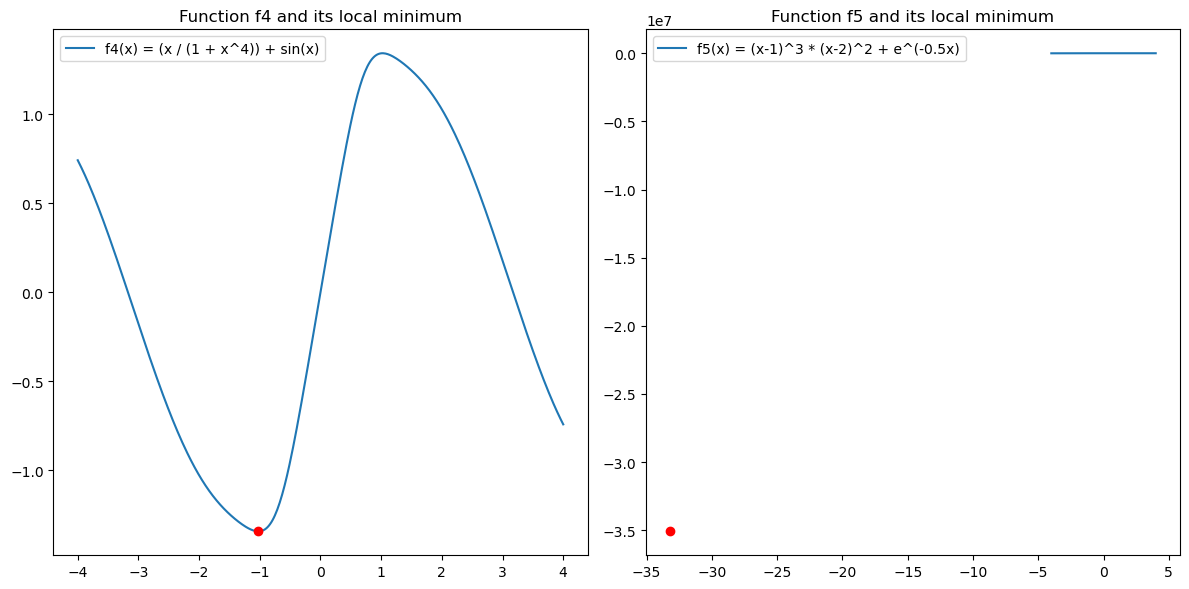

In [16]:
from scipy.optimize import minimize

# Define the functions
def f4(x):
    return ( (x) / (1 + x**4) ) + np.sin(x)

def f5(x):
    return ((x-1)**3) * ((x-2)**2) + (2.7**(-0.5 * x))

# Initial guess for the minimization
x0 = 0

# Minimize the functions
result_f4 = minimize(f4, x0)
result_f5 = minimize(f5, x0)

# Print the results
print(f"Local minimum of f4 near x=0: x = {result_f4.x[0]}, f4(x) = {result_f4.fun}")
print(f"Local minimum of f5 near x=0: x = {result_f5.x[0]}, f5(x) = {result_f5.fun}")

# Plot the functions to find graphically where the local extreme values might be
x_vals = np.linspace(-4, 4, 400)
y_vals_f4 = f4(x_vals)
y_vals_f5 = f5(x_vals)

plt.figure(figsize=(12, 6))

# Plot f4
plt.subplot(1, 2, 1)
plt.plot(x_vals, y_vals_f4, label='f4(x) = (x / (1 + x^4)) + sin(x)')
plt.scatter(result_f4.x, result_f4.fun, color='red', zorder=5)
plt.title('Function f4 and its local minimum')
plt.legend()

# Plot f5
plt.subplot(1, 2, 2)
plt.plot(x_vals, y_vals_f5, label='f5(x) = (x-1)^3 * (x-2)^2 + e^(-0.5x)')
plt.scatter(result_f5.x, result_f5.fun, color='red', zorder=5)
plt.title('Function f5 and its local minimum')
plt.legend()

plt.tight_layout()
plt.show()

# Question 3

Find the integral of sin^2(x) in the interval [0, 2 * pi] in closed form. In this exercise, you will integrate f(x) = sin^2(x) using the Monte Carlo method in the interval [0, 2 * pi] and compare your result with that obtained from your exact solution. Fit the smallest rectangle around the curve sin^2(x) in the interval [0, 2 * pi]. Find x_min, x_max, y_min, and y_max of this rectangle. Generate random numbers using random.uniform() and scale the values to get the x_coord and y_coord of points within this rectangle. Count the number of points that are below the curve sin^2(x). The ratio of the number of points below the curve to the total number of points is the same as the ratio of the area under the curve of sin^2(x) to the area of the rectangle. Show the difference between your computed value of the integral and the exact value as a function of the number of random points generated.

# Question 4

Consider the function f(x) = sin^2[1/(x * (2 - x))]

    (5 points) Plot f(x) vs x from x = 0 to x = 2.

    
    (15 points) This function is perfectly well-behaved in the middle of its range, but it varies infinitely fast at the edges. The entire function fits in a 2 x 1 rectangle. The integral should be finite, but the traditional methods for determining the integral fail. Use the Monte Carlo method to find the integral of this function using 1,000,000 points. Your integral should be correct to three decimal places.